## Preprocessing the Data

In [71]:
import warnings
warnings.filterwarnings('ignore')

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


#### EIN, NAME and STATUS

In [72]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME' 

application_df = application_df.drop(["EIN", "NAME"], axis=1)

In [73]:
# Filtering active status charities 

active_status = application_df['STATUS'] == 1
application_df = application_df.loc[active_status]

In [74]:
application_df = application_df.drop(["STATUS"], axis=1)
#application_df["ORGANIZATION"].count # (34294)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1


In [75]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [76]:
# Determine the number of unique values in each column

application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

#### APPLICATION_TYPE

In [77]:
# Look at APPLICATION_TYPE value counts for binning

type_count = application_df.APPLICATION_TYPE.value_counts()
type_count

T3     27032
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

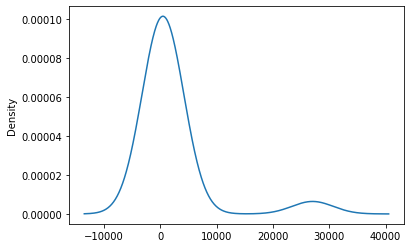

In [78]:
# Visualize the value counts of APPLICATION_TYPE

type_count.plot.density()

In [79]:
# Determine which values to replace if counts are less than 1000
replace_application = list(type_count[type_count < 1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27032
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

#### CLASSIFICATION

In [80]:
# Look at CLASSIFICATION value counts for binning

class_count = application_df.CLASSIFICATION.value_counts()
class_count

C1000    17323
C2000     6073
C1200     4837
C3000     1918
C2100     1882
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

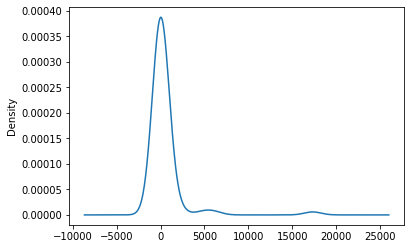

In [81]:
# Visualize the value counts of CLASSIFICATION

class_count.plot.density()

In [82]:
# Determine which values to replace if counts are less than 3000
replace_class = list(class_count[class_count < 3000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17323
C2000     6073
Other     6061
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [83]:
# Generate our categorical variable lists

app_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[app_cat].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            4
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

#### INCOME_AMT

In [84]:
# Create a column to classify 
application_df['WITH_INCOME'] = np.where(application_df['INCOME_AMT']!= '0', True, False)

In [85]:
application_df = application_df.drop(["INCOME_AMT"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,WITH_INCOME
0,Other,Independent,C1000,ProductDev,Association,N,5000,1,False
1,T3,Independent,C2000,Preservation,Co-operative,N,108590,1,True
2,T5,CompanySponsored,Other,ProductDev,Association,N,5000,0,False
3,T3,CompanySponsored,C2000,Preservation,Trust,N,6692,1,True
4,T3,Independent,C1000,Heathcare,Trust,N,142590,1,True


### OneHotEncoder and StandardScaler

In [86]:
# Generate categorical variable list again

app_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[app_cat].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            4
USE_CASE                  5
ORGANIZATION              4
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [87]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[app_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [88]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(app_cat,1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,WITH_INCOME,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,5000,0,False,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,True,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,142590,1,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [89]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [90]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Logistic Regression

In [91]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [92]:
# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.468


## Deep Learning Model

In [93]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()


# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, input_dim=29, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))



# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                2400      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 4,861
Trainable params: 4,861
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Compile the model

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [95]:
# Train the model 

fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6878 - accuracy: 0.5654
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6830 - accuracy: 0.5702
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6814 - accuracy: 0.5737
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6811 - accuracy: 0.5737
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6802 - accuracy: 0.5744
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6794 - accuracy: 0.5752
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6793 - accuracy: 0.5759
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6798 - accuracy: 0.5752
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6791 - accuracy: 0.5779
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6794 - accura

In [96]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6872 - accuracy: 0.5727
Loss: 0.6871670484542847, Accuracy: 0.5727283358573914
